<a href="https://colab.research.google.com/github/SwaroopGaddam/time-series-seasonality/blob/main/time-series-seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seasonality Extractor

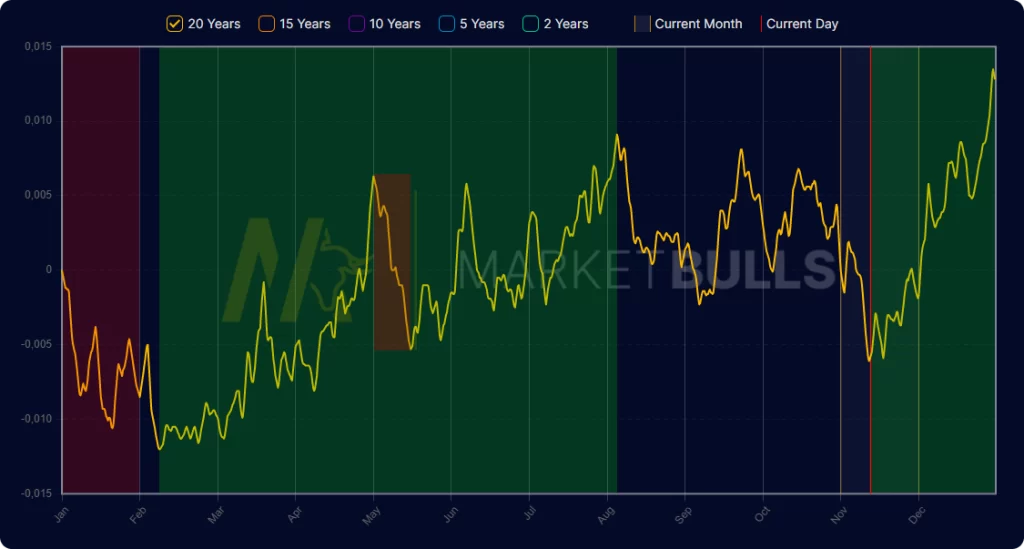

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Input data

To calculate seasonality for any numerical column the required data is   
**1. Period**    - Monthly or Quarterly  
**2. Sales**   - Numerical value

In [36]:
!wget 'https://github.com/SwaroopGaddam/time-series-seasonality/raw/refs/heads/main/data/Input_sales.xlsx' -O Input_sales.xlsx

--2025-04-13 07:12:17--  https://github.com/SwaroopGaddam/time-series-seasonality/raw/refs/heads/main/data/Input_sales.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SwaroopGaddam/time-series-seasonality/refs/heads/main/data/Input_sales.xlsx [following]
--2025-04-13 07:12:17--  https://raw.githubusercontent.com/SwaroopGaddam/time-series-seasonality/refs/heads/main/data/Input_sales.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10613 (10K) [application/octet-stream]
Saving to: ‘Input_sales.xlsx’

Input_sales.xlsx    100%[===================>]  10.36K  --.-KB/s    in 0s      

2025-04-

In [68]:
# --If Input file exists in the local system -- use this code block to upload
#     from google.colab import files
#     uploaded = files.upload()

In [50]:
data=pd.read_excel('Input_sales.xlsx')

In [51]:
data.shape

(48, 2)

In [52]:
data.head()

,Period,Sales
0,2021-01-01,1.592584e+06
1,2021-02-01,1.517149e+06
2,2021-03-01,1.982227e+06
3,2021-04-01,2.247356e+06
4,2021-05-01,2.248614e+06


After loading the input data into a pandas DataFrame. Now to ensure accurate time series analysis, converting the **'Period'** column to a pandas datetime object.

In [53]:
data['Period']=pd.to_datetime(data['Period'])
data.set_index('Period',inplace=True)

Given below is a feasability to trim the dataset if required, modify the values of **start_point** and **end_point** allows to trim rows from the beginning or end of the DataFrame
* By default, start_point and end_point are set to 0, meaning the entire dataset is used.

In [54]:
start_point= 0
end_point = 0

In [55]:
data = data.iloc[start_point:len(data)-end_point]

## Vizualisation Analysis

Plotting a line chart of Sales along with the 3- month Rolling mean over time to visually examine the overall trend and behavior of the numbers and short-term fluctuations over time

In [56]:
data['Rolling_Mean'] = data['Sales'].rolling(window=3).mean()

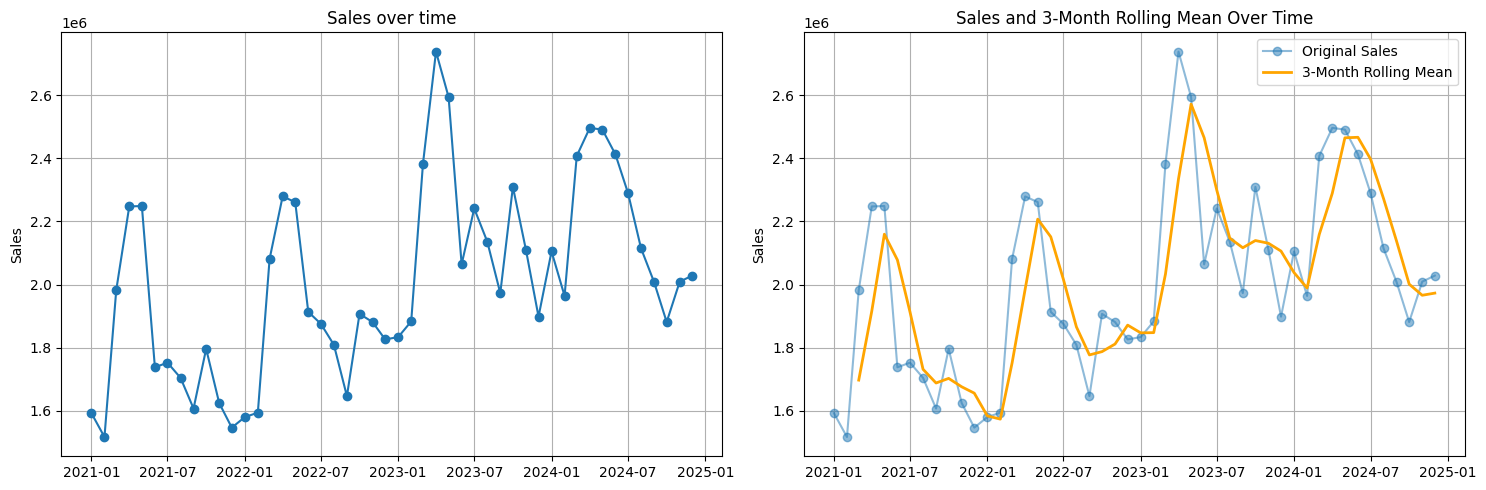

In [62]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(data.index, data['Sales'],marker='o', linestyle='-')
axes[0].set_ylabel('Sales')
axes[0].set_title('Sales over time')
axes[0].grid(True)

axes[1].plot(data.index, data['Sales'], label='Original Sales', marker='o', alpha=0.5)
axes[1].plot(data.index, data['Rolling_Mean'], label='3-Month Rolling Mean', color='orange', linewidth=2)
axes[1].set_title("Sales and 3-Month Rolling Mean Over Time")
axes[1].set_ylabel("Sales")
axes[1].grid(True)
axes[1].legend()
plt.tight_layout()
plt.show()

Also visualizing the monthly sales distribution to identify the highest and lowest performing months in terms of sales.

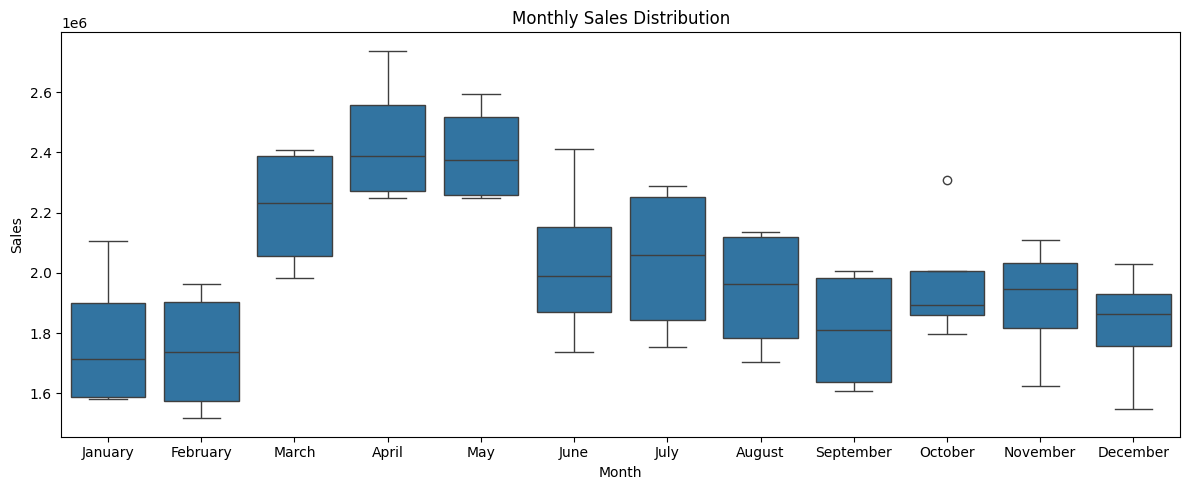

In [63]:
data['Month'] = data.index.month_name()

plt.figure(figsize=(12, 5))
sns.boxplot(x='Month', y='Sales', data=data, order=['January', 'February', 'March', 'April', 'May', 'June',
                                            'July', 'August', 'September', 'October', 'November', 'December'  ])
plt.title("Monthly Sales Distribution")
plt.tight_layout()
plt.show()

## Seasonality Calculation

Here comes the Seasonality extraction part and I have used seasonal_decompose function with an 'additive' model to extract the seasonal pattern for the given numbers with a period of 12 as monthly data is given as input
* Use period=4 when extracting **quarterly seasonality**, as there are four quarters in a year.

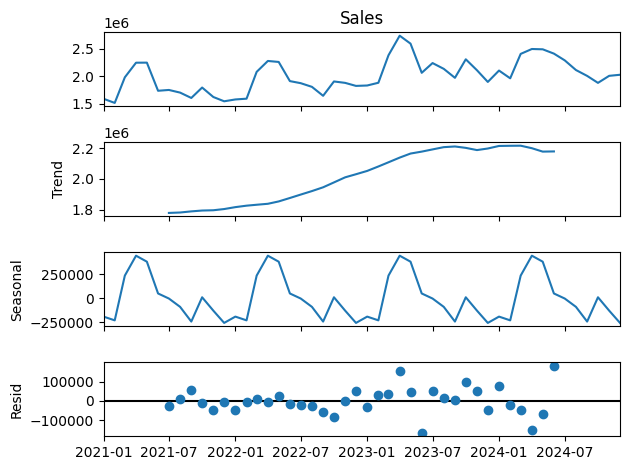

In [64]:
result = seasonal_decompose(data['Sales'],model='additive',period=12)
fig= result.plot()

* As shown above, the decomposition result contains four components: observed sales, trend, seasonal, and residual. The next step is to extract the seasonal component

In [65]:
seasonality = result.seasonal

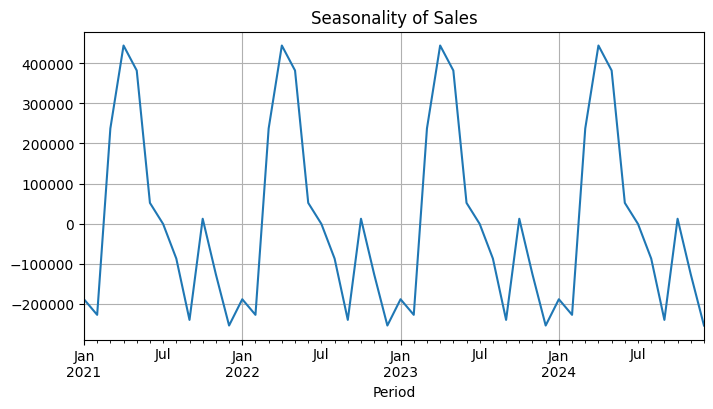

In [66]:
seasonality.plot(title='Seasonality of Sales', figsize=(8,4))
plt.grid(True)
plt.show()

## Saving to CSV

Since the extracted seasonality is stored as a pandas Series, it can be converted into a Dataframe with a specified column name and then saved as csv to the console.

In [67]:
seasonality_df=seasonality.to_frame('Seasonality')
seasonality_df.set_index(data.index).head()

,Seasonality
Period,
2021-01-01,-189018.199892
2021-02-01,-227945.404997
2021-03-01,237379.938316
2021-04-01,444548.048201
2021-05-01,382181.766639


In [18]:
seasonality_df.to_csv('seasonality_output.csv')